In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits

In [ ]:
data = load_digits()

X, y = pd.DataFrame(data.data), pd.DataFrame(data.target)
X.shape, y.shape

((1797, 64), (1797, 1))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.1, random_state=7, stratify=y,
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1617, 64), (1617, 1), (180, 64), (180, 1))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=7)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=7)

In [ ]:
y_pred = clf.predict(X_test)

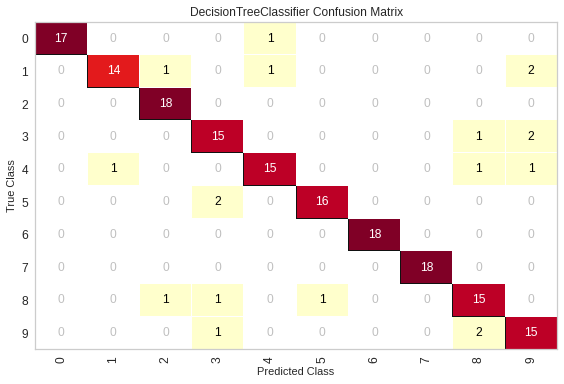

In [ ]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score
)

from yellowbrick.classifier import ConfusionMatrix

classes = list(range(0, 10))
cm = ConfusionMatrix(clf, classes=classes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

In [ ]:
confusion_matrix(y_test, y_pred)

array([[17,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 14,  1,  0,  1,  0,  0,  0,  0,  2],
       [ 0,  0, 18,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 15,  0,  0,  0,  0,  1,  2],
       [ 0,  1,  0,  0, 15,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  2,  0, 16,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 18,  0,  0],
       [ 0,  0,  1,  1,  0,  1,  0,  0, 15,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  2, 15]])

In [ ]:
# classification repport
from sklearn.metrics import classification_report

matrix = classification_report(y_test, y_pred)
print(f'Classification report: \n {matrix}')


Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.93      0.78      0.85        18
           2       0.90      1.00      0.95        18
           3       0.79      0.83      0.81        18
           4       0.88      0.83      0.86        18
           5       0.94      0.89      0.91        18
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        18
           8       0.79      0.83      0.81        18
           9       0.75      0.83      0.79        18

    accuracy                           0.89       180
   macro avg       0.90      0.89      0.89       180
weighted avg       0.90      0.89      0.89       180



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

precision = precision_score(y_test, y_pred, average="micro")
print(f'Precision: {precision}')

recall = recall_score(y_test, y_pred, average="micro")
print(f'Recall: {recall}')

Accuracy: 0.8944444444444445
Precision: 0.8944444444444445
Recall: 0.8944444444444445


In [ ]:
precision = precision_score(y_test, y_pred, average="macro")
print(f'Precision: {precision}')

recall = recall_score(y_test, y_pred, average="macro")
print(f'Recall: {recall}')

Precision: 0.8985810113519092
Recall: 0.8944444444444446


# Error Rate

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits

In [14]:
data = load_digits()

X, y = pd.DataFrame(data.data), pd.DataFrame(data.target)
X.shape, y.shape

((1797, 64), (1797, 1))

In [15]:
from sklearn.model_selection import train_test_split


X_orig, X_test, y_orig, y_test = train_test_split(
    X, y, test_size=.1, stratify=y, random_state=42,
)

X_train, X_dev, y_train, y_dev = train_test_split(
    X_orig, y_orig, 
    test_size=X_test.shape[0]/X_orig.shape[0], 
    # stratify=y, 
    random_state=42,
)

(
    X_train.shape, y_train.shape, 
    X_dev.shape, y_dev.shape, 
    X_test.shape, y_test.shape
 )

((1437, 64), (1437, 1), (180, 64), (180, 1), (180, 64), (180, 1))

In [16]:
np.random.seed(42)

train_indicies = np.random.randint(0, len(X_train), 45)
dev_indicies = np.random.randint(0, len(X_dev), 45)

X_train_dev = pd.concat(
    [X_train.iloc[train_indicies, :], X_dev.iloc[dev_indicies, :]]
)
y_train_dev = pd.concat(
    [y_train.iloc[train_indicies, :], y_dev.iloc[dev_indicies, :]]
)

X_train_dev.shape, y_train_dev.shape

((90, 64), (90, 1))

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score


clf = DecisionTreeClassifier(random_state=7)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=7)

In [18]:
sets = ['Training', 'Train/Dev', 'Validation', 'Testing']
X_sets = [X_train, X_train_dev, X_dev, X_test]
y_sets = [y_train, y_train_dev, y_dev, y_test]

scores = {}

for i in range(len(X_sets)):
  pred = clf.predict(X_sets[i])
  score = recall_score(y_sets[i], pred, average='micro')
  scores[sets[i]] = score

print(scores)


{'Training': 1.0, 'Train/Dev': 0.9333333333333333, 'Validation': 0.8944444444444445, 'Testing': 0.7944444444444444}


In [19]:
res_1 = pd.DataFrame({'Sets': ['Bayes Error'], 'Error Rate': 0},index={'1'})
results = res_1[['Sets','Error Rate']]
results

,Sets,Error Rate
1,Bayes Error,0


In [20]:
res_2 = pd.DataFrame(
    {'Sets': ['Training Set'], 
     'Error Rate': 1-scores['Training']},
     index={'2'}
)
results = pd.concat([results, res_2])
results = results[['Sets','Error Rate']]

res_3 = pd.DataFrame(
    {'Sets': ['Train/Dev Set'], 
     'Error Rate': 1-scores['Train/Dev']},
     index={'3'}
)
results = pd.concat([results, res_3])
results = results[['Sets','Error Rate']]

res_4 = pd.DataFrame(
    {'Sets': ['Validation Set'], 
     'Error Rate': 1-scores['Validation']},
     index={'4'}
)
results = pd.concat([results, res_4])
results = results[['Sets','Error Rate']]

res_5 = pd.DataFrame(
    {'Sets': ['Testing Set'], 
     'Error Rate': 1-scores['Testing']},
     index={'5'}
)
results = pd.concat([results, res_5])
results = results[['Sets','Error Rate']]

In [21]:
results

,Sets,Error Rate
1,Bayes Error,0.000000
2,Training Set,0.000000
3,Train/Dev Set,0.066667
4,Validation Set,0.105556
5,Testing Set,0.205556
